In [67]:
import pandas as pd
df = pd.read_csv("Crop_recommendation_with_clusters.csv")
print(df.head())

   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  env_cluster  
0  202.935536  rice            2  
1  226.655537  rice            2  
2  263.964248  rice            2  
3  242.864034  rice            2  
4  262.717340  rice            2  


In [68]:
features = df.drop(columns=["label", "Crop", "cluster"], errors="ignore")  # Adjust column names if needed

In [69]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = features
y = df["env_cluster"]  # Ensure this column exists

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00        78

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



In [70]:
print(df["env_cluster"].value_counts())

env_cluster
1    1212
2     447
3     347
0     194
Name: count, dtype: int64


In [71]:
grouped = df[["label", "env_cluster"]].groupby("env_cluster").agg(list)
print(grouped)

                                                         label
env_cluster                                                   
0            [chickpea, chickpea, chickpea, chickpea, chick...
1            [maize, maize, maize, maize, maize, maize, mai...
2            [rice, rice, rice, rice, rice, rice, rice, ric...
3            [maize, maize, maize, maize, maize, maize, kid...


In [72]:
for cluster in sorted(df["env_cluster"].unique()):
    crops = df[df["env_cluster"] == cluster]["label"].unique()
    print(f"\n🌾 Cluster {cluster}:")
    for crop in crops:
        print(f" - {crop}")


🌾 Cluster 0:
 - chickpea
 - kidneybeans

🌾 Cluster 1:
 - maize
 - pigeonpeas
 - mothbeans
 - mungbean
 - blackgram
 - lentil
 - pomegranate
 - banana
 - mango
 - grapes
 - watermelon
 - muskmelon
 - apple
 - orange
 - papaya
 - cotton

🌾 Cluster 2:
 - rice
 - maize
 - pigeonpeas
 - banana
 - orange
 - papaya
 - coconut
 - jute
 - coffee

🌾 Cluster 3:
 - maize
 - kidneybeans
 - pigeonpeas
 - mothbeans
 - blackgram
 - mango
 - grapes
 - orange
 - papaya
 - coffee


In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["label", "env_cluster", "cluster_group"], errors="ignore")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
kmeans = KMeans(n_clusters=8, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

In [75]:
for cluster in sorted(df["kmeans_cluster"].unique()):
    crops = df[df["kmeans_cluster"] == cluster]["label"].unique()
    print(f"\n🌾 KMeans Cluster {cluster}:")
    for crop in crops:
        print(f" - {crop}")


🌾 KMeans Cluster 0:
 - maize
 - pigeonpeas
 - mothbeans
 - mungbean
 - blackgram
 - lentil
 - mango
 - orange
 - papaya

🌾 KMeans Cluster 1:
 - rice
 - pigeonpeas
 - papaya
 - jute
 - coffee

🌾 KMeans Cluster 2:
 - maize
 - banana
 - watermelon
 - muskmelon
 - papaya
 - cotton
 - coffee

🌾 KMeans Cluster 3:
 - grapes
 - apple

🌾 KMeans Cluster 4:
 - maize
 - chickpea
 - kidneybeans
 - pigeonpeas
 - mothbeans
 - lentil

🌾 KMeans Cluster 5:
 - pomegranate
 - orange
 - papaya
 - coconut

🌾 KMeans Cluster 6:
 - pigeonpeas
 - mothbeans
 - blackgram
 - mango
 - orange
 - papaya

🌾 KMeans Cluster 7:
 - chickpea


In [76]:
print(df["kmeans_cluster"].value_counts())

kmeans_cluster
2    523
0    392
1    310
5    288
6    217
3    200
4    171
7     99
Name: count, dtype: int64


In [77]:
print(df[df["label"] == "maize"][["label", "kmeans_cluster"]])

     label  kmeans_cluster
100  maize               2
101  maize               0
102  maize               2
103  maize               2
104  maize               2
..     ...             ...
195  maize               2
196  maize               2
197  maize               2
198  maize               2
199  maize               2

[100 rows x 2 columns]


In [78]:
avg_df = df.groupby("label").mean(numeric_only=True)

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_avg_scaled = scaler.fit_transform(avg_df)

kmeans = KMeans(n_clusters=5, random_state=42)
avg_df["cluster"] = kmeans.fit_predict(X_avg_scaled)

In [80]:
for cluster in sorted(avg_df["cluster"].unique()):
    crops = avg_df[avg_df["cluster"] == cluster].index.tolist()
    print(f"\n🌾 Averaged Cluster {cluster}: ({len(crops)} crops)")
    for crop in crops:
        print(f" - {crop}")


🌾 Averaged Cluster 0: (5 crops)
 - coconut
 - coffee
 - jute
 - papaya
 - rice

🌾 Averaged Cluster 1: (4 crops)
 - chickpea
 - kidneybeans
 - orange
 - pomegranate

🌾 Averaged Cluster 2: (2 crops)
 - apple
 - grapes

🌾 Averaged Cluster 3: (6 crops)
 - blackgram
 - lentil
 - mango
 - mothbeans
 - mungbean
 - pigeonpeas

🌾 Averaged Cluster 4: (5 crops)
 - banana
 - cotton
 - maize
 - muskmelon
 - watermelon


In [81]:
cluster_3_crops = avg_df[avg_df["cluster"] == 3]

# Reclustering with 2 sub-clusters inside
from sklearn.cluster import KMeans

X_sub = cluster_3_crops.drop(columns="cluster")
kmeans_sub = KMeans(n_clusters=2, random_state=42)
cluster_3_crops["sub_cluster"] = kmeans_sub.fit_predict(X_sub)

# View refined groups
for sub in sorted(cluster_3_crops["sub_cluster"].unique()):
    crops = cluster_3_crops[cluster_3_crops["sub_cluster"] == sub].index.tolist()
    print(f"\n🔍 Sub-Cluster {sub} inside Cluster 3:")
    for crop in crops:
        print(f" - {crop}")


🔍 Sub-Cluster 0 inside Cluster 3:
 - mango
 - pigeonpeas

🔍 Sub-Cluster 1 inside Cluster 3:
 - blackgram
 - lentil
 - mothbeans
 - mungbean


/var/folders/cf/zn4dq46s1rx6x1s67d5x5v440000gn/T/ipykernel_71680/4265555071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_crops["sub_cluster"] = kmeans_sub.fit_predict(X_sub)


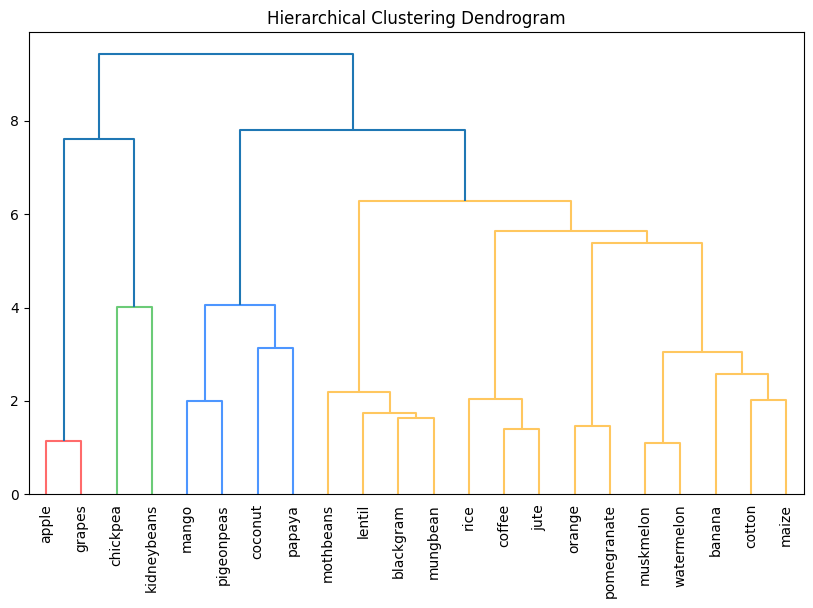

In [82]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

linked = linkage(X_avg_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=avg_df.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Cut tree into, say, 6 clusters
avg_df["cluster"] = fcluster(linked, t=6, criterion='maxclust') - 1

***How to read it:***

- apple and grapes merge at a very low Y-axis level → they're very similar.

- mango and kidneybeans are far apart → they only merge when the tree is high up → less similar.

- When you cut the tree horizontally at any height, you form a certain number of clusters.

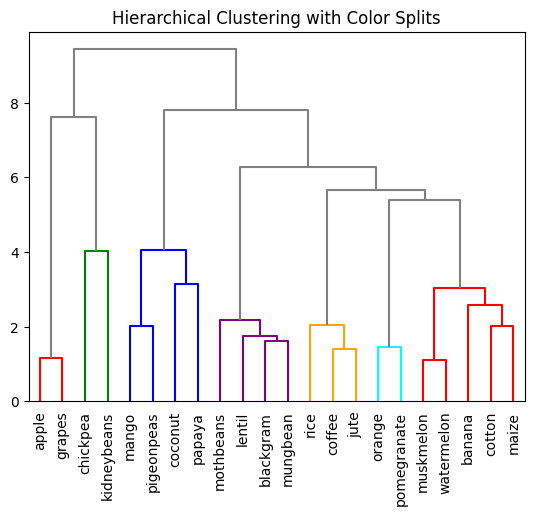

In [83]:
from scipy.cluster.hierarchy import set_link_color_palette

set_link_color_palette(['red', 'green', 'blue', 'purple', 'orange', 'cyan'])
dendrogram(linked,
           labels=avg_df.index.tolist(),
           leaf_rotation=90,
           color_threshold=5,   # Set a threshold where color changes
           above_threshold_color='grey')
plt.title("Hierarchical Clustering with Color Splits")
plt.show()

In [84]:
for cluster_id in sorted(avg_df["cluster"].unique()):
    crops = avg_df[avg_df["cluster"] == cluster_id].index.tolist()
    print(f"\n Cluster {cluster_id} ({len(crops)} crops):")
    for crop in crops:
        print(f" - {crop}")


 Cluster 0 (2 crops):
 - apple
 - grapes

 Cluster 1 (2 crops):
 - chickpea
 - kidneybeans

 Cluster 2 (4 crops):
 - coconut
 - mango
 - papaya
 - pigeonpeas

 Cluster 3 (4 crops):
 - blackgram
 - lentil
 - mothbeans
 - mungbean

 Cluster 4 (3 crops):
 - coffee
 - jute
 - rice

 Cluster 5 (7 crops):
 - banana
 - cotton
 - maize
 - muskmelon
 - orange
 - pomegranate
 - watermelon


In [85]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [86]:
# X_avg_scaled is your scaled feature matrix from earlier
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_avg_scaled)


/Users/yoyolin/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


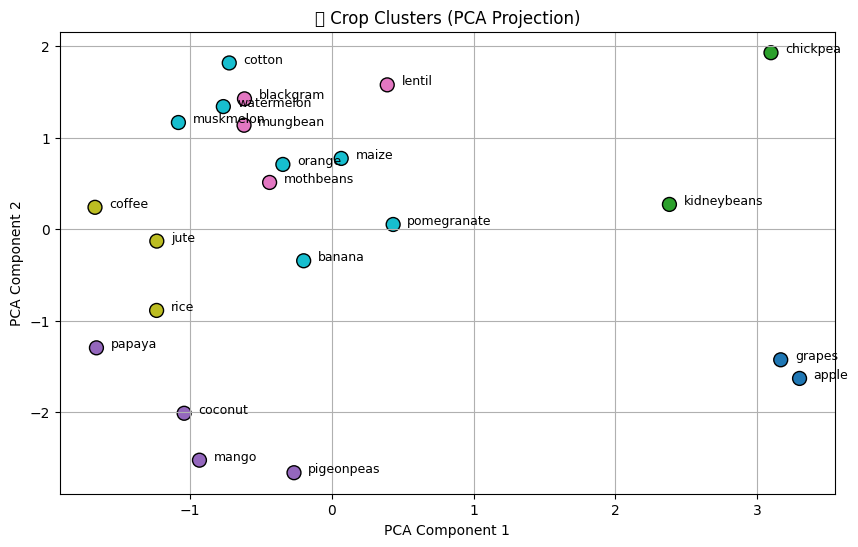

In [87]:
plt.figure(figsize=(10, 6))

# Plot each crop as a point
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=avg_df["cluster"],
    cmap='tab10',  # Gives nice 10-class color scheme
    s=100, edgecolors='k'
)

# Add crop names as annotations
for i, label in enumerate(avg_df.index):
    plt.text(X_pca[i, 0]+0.1, X_pca[i, 1], label, fontsize=9)

plt.title("🌾 Crop Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [90]:
from mpl_toolkits.mplot3d import Axes3D  # enables 3D projection
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [96]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

# Redo 3D PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_avg_scaled)

# Make sure 'cluster' is present and index matches the crop names
plot_df = pd.DataFrame(X_pca_3d, columns=["PCA1", "PCA2", "PCA3"])
plot_df["Crop"] = avg_df.index
plot_df["Cluster"] = avg_df["cluster"].astype(str).values  # 💡 fix here!

# Interactive 3D scatter
fig = px.scatter_3d(
    plot_df,
    x="PCA1", y="PCA2", z="PCA3",
    color="Cluster",               # ✅ each cluster will get a different color
    text="Crop",
    title="Interactive 3D Crop Clustering (PCA)",
    width=900, height=700
)

fig.update_traces(marker=dict(size=6), textposition="top center")
fig.update_layout(legend_title_text="Cluster")

fig.show()